In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('T_F41SCHEDULE_B43.csv')

<ipython-input-2-d9a5a9778e37>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('T_F41SCHEDULE_B43.csv')


In [3]:
data.head(5) #checking if data runs

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
0,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7858,N202PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/28/2003 12:00:00 AM,20397.0,16
1,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7860,N206PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/30/2003 12:00:00 AM,20397.0,16
2,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7873,N207PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,11/26/2003 12:00:00 AM,20397.0,16
3,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7874,N209PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/4/2003 12:00:00 AM,20397.0,16
4,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7879,N213PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/16/2003 12:00:00 AM,20397.0,16


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

##PART 1

#Manufacture Year
We cannot impute the manufacturing year. This will be unique for each aircraft and we cannot make a reasonable guess as to which one this.

In [5]:
data[data['MANUFACTURE_YEAR'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y
124680,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10134,N655CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124681,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10182,N690CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E


#Capacity in Pounds
We can impute the capacity in pounds. This is because each aircraft will have a different capacities, depending on a variety of factors. We can simply take the median weight for each aircraft type. This is seen below:

In [6]:
data[data['CAPACITY_IN_POUNDS'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
78991,2017,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,b,Y,181.0,BOEING,6251,B767-200,NaN,7/1/2013 12:00:00 AM,20007.0,5Y
79015,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/17/2013 12:00:00 AM,20007.0,5Y
79016,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/22/2013 12:00:00 AM,20007.0,5Y
81902,2017,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46601,N365FE,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,NaN,11/6/1997 12:00:00 AM,20107.0,FX
81903,2017,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46606,N368FE,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,NaN,8/21/1997 12:00:00 AM,20107.0,FX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82456,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48791,N620FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,3/25/1999 12:00:00 AM,20107.0,FX
82457,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48792,N621FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,5/28/1999 12:00:00 AM,20107.0,FX
82458,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48794,N623FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,6/28/1999 12:00:00 AM,20107.0,FX
90567,2018,NK,Spirit Air Lines,2018.0,Spirit Air Lines,8658,N908NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGRneo,NaN,12/17/2018 12:00:00 AM,20416.0,NK


In [7]:
#checking for the 767-200
data[data['MODEL']=='B767-200']['CAPACITY_IN_POUNDS'].unique()

array([     0., 265000., 237756.,     nan, 213390.])

In [8]:
#checking the DC-10-10
data[data['MODEL']=='DC-10-10']['CAPACITY_IN_POUNDS'].unique()

array([136842., 136662., 138160., 136438., 137462., 136952., 138389.,
       138263., 136598., 137410., 137550., 138004., 138430., 137404.,
       139719., 137614., 138346., 138566., 137548., 138952., 139406.,
       138878., 139422., 140839., 137752., 139038., 138114., 139513.,
       137124., 137630., 136583., 137349., 138681., 138785., 139305.,
       138561., 137907., 137850., 140258., 137790., 136765., 138014.,
       140426., 139299., 136473., 136666., 136963., 136748., 135918.,
       135592., 136271., 139840., 136667., 136198., 138117., 137273.,
       138232., 138484.,     nan])

In [9]:
median_by_type = data.groupby('AIRCRAFT_TYPE')['CAPACITY_IN_POUNDS'].median()

data['CAPACITY_IN_POUNDS'] = data.apply(
    lambda row: median_by_type[row['AIRCRAFT_TYPE']]
    if pd.isna(row['CAPACITY_IN_POUNDS']) and row['AIRCRAFT_TYPE'] in median_by_type
    else row['CAPACITY_IN_POUNDS'],
    axis=1
)

#here we impute the capacity in pounds with the median for the corresponding aircraft type


#Number of Seats
We can impute the number of seats. Filtering the data out, we can see that it is the cargo airplanes that have missing values.

In [10]:
data[data['NUMBER_OF_SEATS'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
97550,2019,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,NaN,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
97551,2019,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
97552,2019,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
97553,2019,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,7/15/2016 12:00:00 AM,20151.0,M6
97554,2019,M6,Amerijet International,1991.0,Amerijet International,25195,N396CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,11/29/2017 12:00:00 AM,20151.0,M6
97555,2019,M6,Amerijet International,1993.0,Amerijet International,26995,N347CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,10/12/2018 12:00:00 AM,20151.0,M6
97556,2019,M6,Amerijet International,1994.0,Amerijet International,27184,N378CX,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,6/8/2018 12:00:00 AM,20151.0,M6


In [11]:
data['NUMBER_OF_SEATS'] = data['NUMBER_OF_SEATS'].fillna(0)

#Carrier Name
We can impute the carrier name. We can see that only the L4 and OH carrier have missing carrier names

In [12]:
data[data['CARRIER_NAME'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11465,2007,L4,NaN,2007.0,NaN,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,NaN,NaN
11466,2007,L4,NaN,2007.0,NaN,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,NaN,NaN
11467,2007,L4,NaN,2007.0,NaN,4170,N503LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/12/2007 12:00:00 AM,NaN,NaN
11468,2007,L4,NaN,2007.0,NaN,4172,N504LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/19/2007 12:00:00 AM,NaN,NaN
11469,2007,L4,NaN,2007.0,NaN,4174,N505LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/25/2007 12:00:00 AM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,2013,OH,NaN,2008.0,NaN,15157,N538CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/11/2008 12:00:00 AM,NaN,NaN
54703,2013,OH,NaN,2008.0,NaN,15159,N548CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/28/2008 12:00:00 AM,NaN,NaN
54704,2013,OH,NaN,2008.0,NaN,15164,N549CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,2/29/2008 12:00:00 AM,NaN,NaN
54705,2013,OH,NaN,2008.0,NaN,15168,N554CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,3/20/2008 12:00:00 AM,NaN,NaN


In [13]:
data[data['CARRIER_NAME'].isnull()]['CARRIER'].unique()

array(['L4', 'OH'], dtype=object)

In [14]:
data[data['CARRIER']=='L4']['CARRIER_NAME'].unique() #We can conclude that L4 must be the Lynx Aviation d/b/a Frontier Airlines

array([nan, 'Lynx Aviation d/b/a Frontier Airlines'], dtype=object)

In [15]:
data.loc[(data['CARRIER'] == "L4") & (data['CARRIER_NAME'].isna()),'CARRIER_NAME'] = 'Lynx Aviation d/b/a Frontier Airlines'

In [16]:
data[data['CARRIER']=='OH']['CARRIER_NAME'].unique()

array(['Comair Inc.', nan, 'PSA Airlines Inc.'], dtype=object)

In [17]:
data[data['CARRIER']=='OH'][data['CARRIER_NAME']=='Comair Inc.']

<ipython-input-17-ac64eace54b1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['CARRIER']=='OH'][data['CARRIER_NAME']=='Comair Inc.']


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
4896,2006,OH,Comair Inc.,1993.0,Comair Inc.,7011,N912CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,4/29/1993 12:00:00 AM,20417.0,OH
4897,2006,OH,Comair Inc.,1993.0,Comair Inc.,7012,N914CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,4/29/1993 12:00:00 AM,20417.0,OH
4898,2006,OH,Comair Inc.,1993.0,Comair Inc.,7013,N915CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,6/25/1993 12:00:00 AM,20417.0,OH
4899,2006,OH,Comair Inc.,1993.0,Comair Inc.,7014,N916CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,6/3/1993 12:00:00 AM,20417.0,OH
4900,2006,OH,Comair Inc.,1993.0,Comair Inc.,7017,N917CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,7/29/1993 12:00:00 AM,20417.0,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40859,2011,OH,Comair Inc.,2008.0,Comair Inc.,15157,N538CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/11/2008 12:00:00 AM,20417.0,OH (1)
40860,2011,OH,Comair Inc.,2008.0,Comair Inc.,15159,N548CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/28/2008 12:00:00 AM,20417.0,OH (1)
40861,2011,OH,Comair Inc.,2008.0,Comair Inc.,15164,N549CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,2/29/2008 12:00:00 AM,20417.0,OH (1)
40862,2011,OH,Comair Inc.,2008.0,Comair Inc.,15168,N554CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,3/20/2008 12:00:00 AM,20417.0,OH (1)


In [18]:
data[data['CARRIER']=='OH'][data['CARRIER_NAME']=='PSA Airlines Inc.']

<ipython-input-18-a15e56ca89c2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['CARRIER']=='OH'][data['CARRIER_NAME']=='PSA Airlines Inc.']


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
68915,2015,OH,PSA Airlines Inc.,2001.0,PSA Airlines Inc.,10018,N502AE,b,Y,70.0,GE,6311,CRJ701,67000.0,11/2/2015 12:00:00 AM,20397.0,OH
68916,2015,OH,PSA Airlines Inc.,2001.0,PSA Airlines Inc.,10025,N500AE,b,Y,70.0,GE,6311,CRJ701,67000.0,8/22/2015 12:00:00 AM,20397.0,OH
68917,2015,OH,PSA Airlines Inc.,2002.0,PSA Airlines Inc.,10021,N503AE,b,Y,70.0,GE,6311,CRJ701,67000.0,8/31/2015 12:00:00 AM,20397.0,OH
68918,2015,OH,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,10078,N509AE,b,Y,70.0,GE,6311,CRJ701,67000.0,6/14/2015 12:00:00 AM,20397.0,OH
68919,2015,OH,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,10105,N510AE,b,Y,70.0,GE,6311,CRJ701,67000.0,7/28/2015 12:00:00 AM,20397.0,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129269,2023,OH,PSA Airlines Inc.,2019.0,PSA Airlines Inc.,15476,N610NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,11/21/2019 12:00:00 AM,20397.0,OH
129270,2023,OH,PSA Airlines Inc.,2019.0,PSA Airlines Inc.,15477,N612NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,12/5/2019 12:00:00 AM,20397.0,OH
129271,2023,OH,PSA Airlines Inc.,2020.0,PSA Airlines Inc.,15481,N613NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,2/20/2020 12:00:00 AM,20397.0,OH
129272,2023,OH,PSA Airlines Inc.,2020.0,PSA Airlines Inc.,15483,N614NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,3/12/2020 12:00:00 AM,20397.0,OH


The code OH changes after 2012, from Comair Inc. to PSA Airlines

In [19]:
data.loc[(data['YEAR'] > 2012) & (data['CARRIER_NAME'].isna()),'CARRIER_NAME'] = 'PSA Airlines Inc.'

In [20]:
data.loc[(data['YEAR'] < 2012) & (data['CARRIER_NAME'].isna()),'CARRIER_NAME'] = 'Comair Inc.'

#Airline ID
Similarly with Airline ID, we can investigate the missing IDs and see whether we can manually piece together the supposed true values:

In [21]:
data[data['AIRLINE_ID'].isnull()]['CARRIER_NAME'].unique()

array(['Lynx Aviation d/b/a Frontier Airlines', 'PSA Airlines Inc.'],
      dtype=object)

The trouble seems to be with Lynx Aviation and PSA Airlines Inc. My intuition is that the codes should be consistent with the carrier names. I check this below

In [22]:
data[data['CARRIER_NAME']=='Lynx Aviation d/b/a Frontier Airlines']['AIRLINE_ID'].unique()

array([   nan, 21217.])

In [23]:
data[data['CARRIER_NAME']=='PSA Airlines Inc.']['AIRLINE_ID'].unique()

array([20397.,    nan])

We can see that PSA has a code of 20397 and Lynx has a code of 21217
and is consistent.

In [24]:
data.loc[(data['CARRIER_NAME']=='PSA Airlines Inc.') & (data['AIRLINE_ID'].isna()),'AIRLINE_ID'] = 20397

In [25]:
data.loc[(data['CARRIER_NAME']=='Lynx Aviation d/b/a Frontier Airlines') & (data['AIRLINE_ID'].isna()),'AIRLINE_ID'] = 21217

#Carrier
We can do similarly with CARRIER. We can see which ones are missing and see if we can manually input it.

In [26]:
data[data['CARRIER'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11776,2007,NaN,North American Airlines,1993.0,North American Airlines,26257,N760NA,B,Y,273.0,BOEING,NaN,B767-3,104476.0,3/23/2004 12:00:00 AM,20415.0,NaN
11777,2007,NaN,North American Airlines,1995.0,North American Airlines,26277,N750NA,B,Y,199.0,BOEING,NaN,B757-2,58491.0,1/27/1995 12:00:00 AM,20415.0,NaN
11778,2007,NaN,North American Airlines,1996.0,North American Airlines,28039,N769NA,B,Y,268.0,BOEING,NaN,B767-3,100500.0,2/19/2007 12:00:00 AM,20415.0,NaN
11779,2007,NaN,North American Airlines,1996.0,North American Airlines,28098,N765NA,B,Y,206.0,BOEING,NaN,B767-3,94523.0,3/23/2006 12:00:00 AM,20415.0,NaN
11780,2007,NaN,North American Airlines,1997.0,North American Airlines,28174,N752NA,B,Y,199.0,BOEING,NaN,B757-2,58948.0,5/12/1999 12:00:00 AM,20415.0,NaN
11781,2007,NaN,North American Airlines,2000.0,North American Airlines,30043,N755NA,B,Y,199.0,BOEING,NaN,B757-2,56526.0,2/25/2003 12:00:00 AM,20415.0,NaN
11782,2007,NaN,North American Airlines,2001.0,North American Airlines,29381,N754NA,B,Y,199.0,BOEING,NaN,B757-2,58550.0,4/2/2001 12:00:00 AM,20415.0,NaN
11783,2007,NaN,North American Airlines,2001.0,North American Airlines,32448,N756NA,B,Y,199.0,BOEING,NaN,B757-2,58159.0,6/3/2001 12:00:00 AM,20415.0,NaN
11784,2007,NaN,North American Airlines,2002.0,North American Airlines,27569,N767NA,B,Y,247.0,BOEING,NaN,B767-3,105420.0,8/14/2002 12:00:00 AM,20415.0,NaN
11785,2007,NaN,North American Airlines,2002.0,North American Airlines,29898,N768NA,B,Y,262.0,BOEING,NaN,B767-3,103057.0,9/6/2002 12:00:00 AM,20415.0,NaN


In [27]:
data[data['CARRIER'].isnull()]['CARRIER_NAME'].unique()

array(['North American Airlines'], dtype=object)

Its all North American Airlines. Because the Carrier Code is listed as NA (https://en.wikipedia.org/wiki/North_American_Airlines) we can see that the code can be filled in quite easily.

In [28]:
data['CARRIER'] = data['CARRIER'].fillna('NA')

##PART 2


#Manufacturer

In [29]:
data['MANUFACTURER'].value_counts().head(50)

,count
MANUFACTURER,
BOEING,15922
Embraer,11508
THEBOEINGCO,9223
Bombardier,8871
Boeing,8392
BoeingCo,7446
AIRBUS,7179
AirbusIndustries,6967
BOEINGCOMPANY,6767


Time to start replacing the duplicate names. We thus need to STANDARDIZE the manufacturer names. We can see that the data is needs to be standardized by making it all upper case, removing space. I also chose to TRANSFORM a lot of the names, erasing any additional full names such as the, company, industrie, etc. We also see a duplicate mcdonneldouglas. which I condensed down.

In [30]:
data['MANUFACTURER'] = data['MANUFACTURER'].str.upper()
data['MANUFACTURER'] = data['MANUFACTURER'].str.strip()
data['MANUFACTURER'] = data['MANUFACTURER'].str.replace(r"[.-]", "", regex=True)
data['MANUFACTURER'] = data['MANUFACTURER'].str.replace(r"THE", "", regex=True)
data['MANUFACTURER'] = data['MANUFACTURER'].str.replace(r"(COMPANY|CO|INDUSTRIES|INDUSTRIE|AIRCRAFT|AEROSPACE)$", "", regex=True)
data['MANUFACTURER'] = data['MANUFACTURER'].str.replace(r"MCDONNELLDOUGLAS", "MCDONNELDOUGLAS", regex=True)

In [31]:
data['MANUFACTURER'].value_counts().head(50)

,count
MANUFACTURER,
BOEING,55517
AIRBUS,23513
EMBRAER,15554
BOMBARDIER,12483
MCDONNELDOUGLAS,9201
CESSNA,4514
CANADAIR,3861
DOUGLAS,1442
ATR,1181


#Model

In [32]:
data['MODEL'].value_counts().head(50)

,count
MODEL,
EMB-145,2614
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
737-700PASSENGERONLY,2027
C-208B,1872
B757-2,1775
CRJ-2/4,1761


We can see that there are some functions we can standardize but not as extensive as manufacturer. We can replace dashes, spaces and slashe.

In [33]:
data['MODEL'] = data['MODEL'].str.upper()
data['MODEL'] = data['MODEL'].str.strip()
data['MODEL'] = data['MODEL'].str.replace(r"-", "", regex=True)
data['MODEL'] = data['MODEL'].str.replace(r"/", "", regex=True)

In [34]:
data['MODEL'].value_counts().head(50)

,count
MODEL,
EMB145,3052
B7377H4,2470
B737823,2370
B7572,2369
A320232,2333
A321231,2259
737700PASSENGERONLY,2027
CRJ200,1929
C208B,1872


#Aircraft Status

In [35]:
data['AIRCRAFT_STATUS'].value_counts().head(50)

,count
AIRCRAFT_STATUS,
O,79487
b,30852
B,12699
a,7804
A,1330
L,122
o,19


The only changes we have to standardize it to make it all uppercase. Other than that, it is already clean and simplified

In [36]:
data['AIRCRAFT_STATUS'] = data['AIRCRAFT_STATUS'].str.upper()

#Operating Status

In [37]:
data['OPERATING_STATUS'].value_counts().head(50)

,count
OPERATING_STATUS,
Y,126577
N,5664
y,71
,1


The only changes we have to make is to make it all uppercase. Other than that, it is already clean and simplified. There is one null value which we can leave as being empty

In [38]:
data['OPERATING_STATUS'] = data['OPERATING_STATUS'].str.upper()

##PART 3

In [39]:
clean_data = data.dropna()
print("The amount of dropped data is:", data.shape[0] - clean_data.shape[0])

The amount of dropped data is: 31038


##PART 4

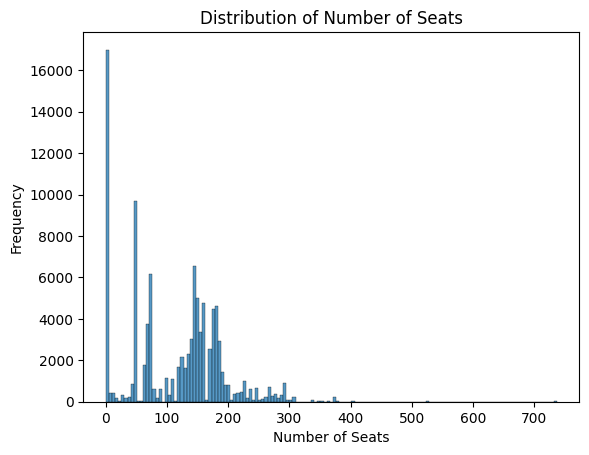

In [40]:
sns.histplot(clean_data['NUMBER_OF_SEATS'])
plt.title('Distribution of Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()


In [41]:
clean_data['NUMBER_OF_SEATS'].skew()

np.float64(0.3783654416707764)

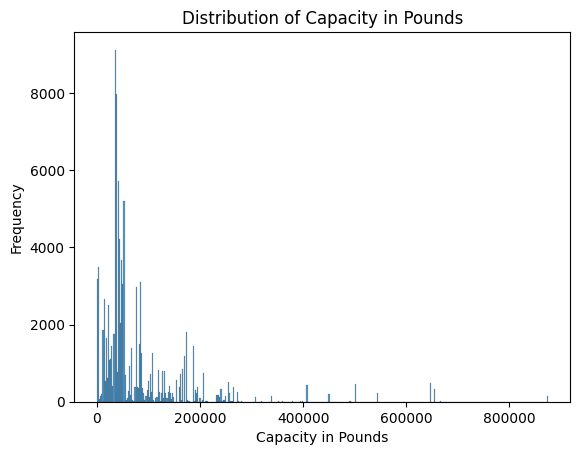

In [42]:
sns.histplot(clean_data['CAPACITY_IN_POUNDS'])
plt.title('Distribution of Capacity in Pounds')
plt.xlabel('Capacity in Pounds')
plt.ylabel('Frequency')
plt.show()


In [43]:
clean_data['CAPACITY_IN_POUNDS'].skew()

np.float64(3.759885338848842)

<ipython-input-44-beaf0d2fd8da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['CAPACITY_IN_POUNDS_BOXCOX'] = np.nan


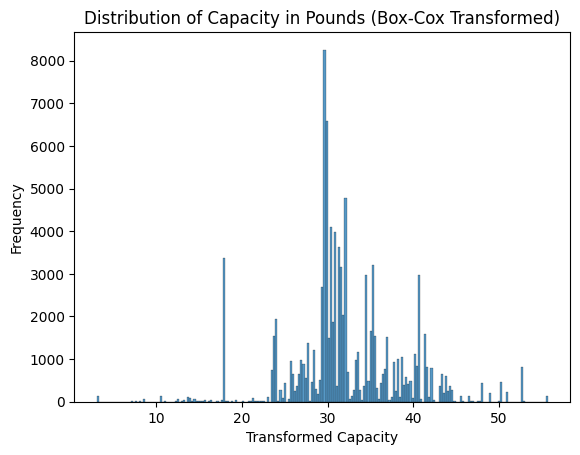

In [44]:
from scipy.stats import boxcox
import numpy as np

clean_data['CAPACITY_IN_POUNDS_BOXCOX'] = np.nan

# creating copies where values are positive
mask_cap = clean_data['CAPACITY_IN_POUNDS'] > 0
valid_data_cap = clean_data.loc[mask_cap, 'CAPACITY_IN_POUNDS']

#run boxcox
transformed, fitted_lambda = boxcox(valid_data_cap)

#assigning data
clean_data.loc[mask_cap, 'CAPACITY_IN_POUNDS_BOXCOX'] = transformed

# Step 5: Plot the histogram
sns.histplot(clean_data['CAPACITY_IN_POUNDS_BOXCOX'])
plt.title('Distribution of Capacity in Pounds (Box-Cox Transformed)')
plt.xlabel('Transformed Capacity')
plt.ylabel('Frequency')
plt.show()




In [45]:
clean_data['CAPACITY_IN_POUNDS_BOXCOX'].skew()

np.float64(0.1182504791767059)

<ipython-input-46-81871a4d8718>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['NUMBER_OF_SEATS_BOXCOX'] = np.nan


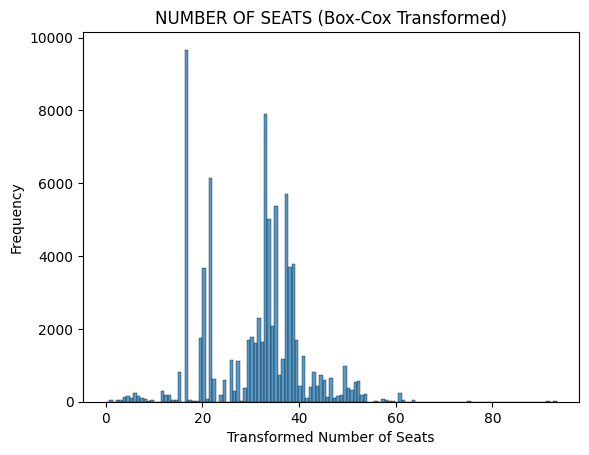

In [46]:
clean_data['NUMBER_OF_SEATS_BOXCOX'] = np.nan

# creating copies where values are positive
mask_seat = clean_data['NUMBER_OF_SEATS'] > 0
valid_data_seat = clean_data.loc[mask_seat, 'NUMBER_OF_SEATS']

#run boxcox
transformed, fitted_lambda = boxcox(valid_data_seat)

#assigning data
clean_data.loc[mask_seat, 'NUMBER_OF_SEATS_BOXCOX'] = transformed

# Step 5: Plot the histogram
sns.histplot(clean_data['NUMBER_OF_SEATS_BOXCOX'])
plt.title('NUMBER OF SEATS (Box-Cox Transformed)')
plt.xlabel('Transformed Number of Seats')
plt.ylabel('Frequency')
plt.show()


In [47]:
clean_data['NUMBER_OF_SEATS_BOXCOX'].skew()

np.float64(-0.003815580429632106)

Previously, both graphs were heavily shewed to the right, both having relatively high skew numbers of 0.378 for Capacity and 3.77 for Number of Seats. However, after the boxcox transformation, both figures became a lot more normalized and resembled that of a normal distribution. The amount of skew also decreased with -0.004 for the number of seats and 0.119 for the capacity.

## PART 5

In [48]:
# Compute the quartile thresholds once
q1 = clean_data['NUMBER_OF_SEATS'].quantile(0.25)
q2 = clean_data['NUMBER_OF_SEATS'].quantile(0.50)
q3 = clean_data['NUMBER_OF_SEATS'].quantile(0.75)

# Use pd.cut to categorize based on these bins
bins = [-np.inf, q1, q2, q3, np.inf]
labels = ['SMALL', 'MEDIUM', 'LARGE', 'XLARGE']

clean_data['SIZE'] = pd.cut(clean_data['NUMBER_OF_SEATS'], bins=bins, labels=labels)

<ipython-input-48-38a38915d41b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['SIZE'] = pd.cut(clean_data['NUMBER_OF_SEATS'], bins=bins, labels=labels)


In [49]:
clean_data['SIZE']

,SIZE
29239,MEDIUM
29240,MEDIUM
29241,MEDIUM
29242,MEDIUM
29243,SMALL
...,...
132308,SMALL
132309,SMALL
132310,SMALL
132311,SMALL


<ipython-input-56-2a35347bb0e3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  op_status = clean_data.groupby(['SIZE', 'OPERATING_STATUS']).size().unstack()


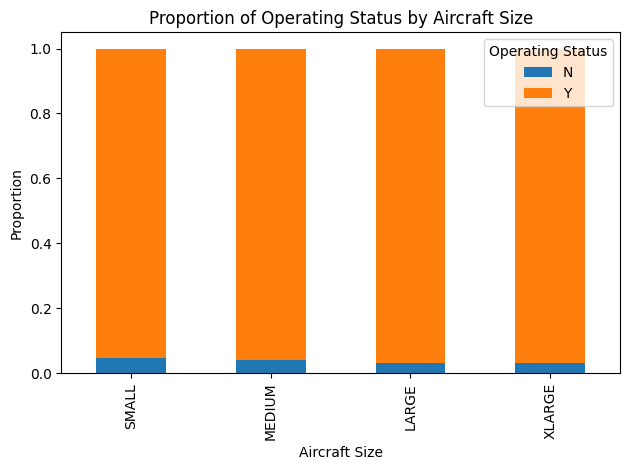

In [56]:
# Group and compute proportions
op_status = clean_data.groupby(['SIZE', 'OPERATING_STATUS']).size().unstack()

# Define size order
size_order = ['SMALL', 'MEDIUM', 'LARGE', 'XLARGE']
op_status = op_status.reindex(size_order)

# Normalize rows to get proportions
op_status_prop = op_status.div(op_status.sum(axis=1), axis=0)

# Plot the chart
op_status_prop.iloc[:, 1:3].plot(kind='bar', stacked=True)
plt.title('Proportion of Operating Status by Aircraft Size')
plt.ylabel('Proportion')
plt.xlabel('Aircraft Size')
plt.legend(title='Operating Status')
plt.tight_layout()
plt.show()

In [54]:
op_status_prop

OPERATING_STATUS,,N,Y
SIZE,,,
SMALL,0.000034,0.046695,0.953271
MEDIUM,0.000000,0.040401,0.959599
LARGE,0.000000,0.032507,0.967493
XLARGE,0.000000,0.031194,0.968806


<ipython-input-58-fe11585afb83>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ac_status = clean_data.groupby(['SIZE', 'AIRCRAFT_STATUS']).size().unstack()


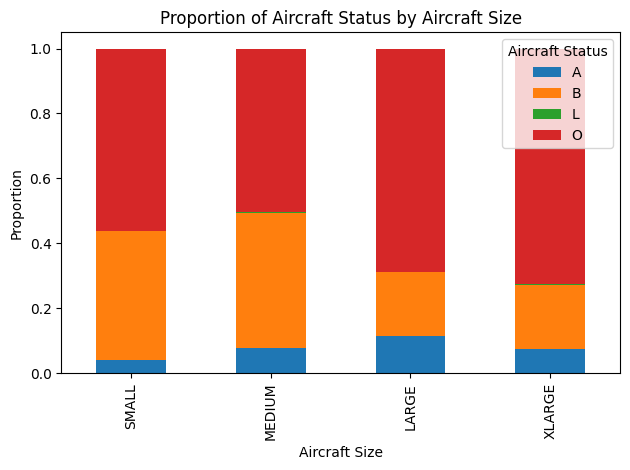

In [58]:
ac_status = clean_data.groupby(['SIZE', 'AIRCRAFT_STATUS']).size().unstack()

size_order = ['SMALL', 'MEDIUM', 'LARGE', 'XLARGE']
ac_status = ac_status.reindex(size_order)

ac_status_prop = ac_status.div(ac_status.sum(axis=1), axis=0)

ac_status_prop.plot(kind='bar', stacked=True)
plt.title('Proportion of Aircraft Status by Aircraft Size')
plt.ylabel('Proportion')
plt.xlabel('Aircraft Size')
plt.legend(title='Aircraft Status')
plt.tight_layout()
plt.show()

In [59]:
ac_status_prop

AIRCRAFT_STATUS,A,B,L,O
SIZE,,,,
SMALL,0.039327,0.398868,0.000000,0.561805
MEDIUM,0.076401,0.417115,0.001592,0.504892
LARGE,0.115545,0.195040,0.001869,0.687546
XLARGE,0.075635,0.196234,0.001606,0.726525
